### Importa las librerías

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import time

### array de NumPy vs. tensor de PyTorch.

In [2]:
n = np.linspace(0,1,5)
t = torch.linspace(0,1,5)

In [3]:
print("Array: ", n)
print("Tensor: ", t)

Array:  [0.   0.25 0.5  0.75 1.  ]
Tensor:  tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])


#### Crea una secuencia de 48 números consecutivos y luego los reorganizan en una estructura tridimensional (tensor o array) de tamaño 3x4x4:

In [4]:
n = np.arange(48).reshape(3,4,4)
t = torch.arange(48).reshape(3,4,4)

In [5]:
from IPython.display import display, HTML

html_code = f"""
<div style="display: flex; justify-content: space-between;">
    <div style="width: 40%;">
        <h3>NumPy Array:</h3>
        <pre>{n}</pre>
    </div>
    <div style="width: 40%;">
        <h3>PyTorch Tensor:</h3>
        <pre>{t}</pre>
    </div>
</div>
"""

display(HTML(html_code))

### Broadcasting Rules

In [6]:
# Tensor 'a' de dimensiones (6, 5) lleno de unos
a = torch.ones((6,5))
# Tensor 'b' que contiene los números del 0 al 4, y da la forma de (1, 5)
b = torch.arange(5).reshape((1,5))

In [7]:
from IPython.display import display, HTML

html_code = f"""
<div style="display: flex; justify-content: space-between;">
    <div style="width: 40%;">
        <h3>Tensor a:</h3>
        <pre>{a}</pre>
    </div>
    <div style="width: 40%;">
        <h3>Tensor b:</h3>
        <pre>{b}</pre>
    </div>
</div>
"""

display(HTML(html_code))

In [8]:
a+b

tensor([[1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.]])

In [9]:
# Tensor A de tamaño (3, 4)
A = torch.tensor([[1, 2, 3, 4],
                  [5, 6, 7, 8],
                  [9, 10, 11, 12]])

# Tensor B de tamaño (1, 4)
B = torch.tensor([[10, 20, 30, 40]])

# Multiplica A * B utilizando broadcasting
result = A * B

print(result)

tensor([[ 10,  40,  90, 160],
        [ 50, 120, 210, 320],
        [ 90, 200, 330, 480]])


### Escalar los canales de color de una imagen

In [10]:
# Creamos un tensor aleatorio que simula una imagen con dimensiones (256, 256, 3)
Image = torch.randn((256, 256, 3))

# Creamos un tensor que representa los factores de escala para cada canal de color
Scale = torch.tensor([0.5, 1.5, 1])  # Escala para los canales R, G, B

# Multiplicamos la imagen por los factores de escala
# La difusión permite que 'Scale' se extienda a la forma de 'Image' para realizar la multiplicación
Result = Image * Scale

# Result ahora tiene las dimensiones (256, 256, 3) y ha escalado cada canal de color de la imagen.
print(f'Imagen escalada: {Result}')

Imagen escalada: tensor([[[-0.1809, -0.8797,  0.1364],
         [ 0.1190, -1.0726,  0.4973],
         [ 0.5880,  1.2057, -0.2836],
         ...,
         [ 0.2848, -0.5946,  0.8553],
         [ 0.4440,  0.5499, -1.9938],
         [ 0.0888,  2.0982, -1.3430]],

        [[ 0.2533,  1.3958, -0.4616],
         [ 0.8919,  0.3561,  0.4584],
         [-0.1096, -3.6337, -1.1837],
         ...,
         [ 0.4158, -0.5037,  0.8580],
         [-0.2120, -2.8935,  0.9248],
         [ 0.4426, -0.6163, -0.4001]],

        [[-0.8054,  1.7084,  0.1711],
         [-0.3741,  1.9726,  0.2022],
         [-0.4654,  0.2247, -1.3645],
         ...,
         [ 0.6695,  1.1860, -0.5351],
         [-0.4417, -0.2719,  1.3178],
         [ 1.0293, -1.4090, -2.1300]],

        ...,

        [[ 0.6064,  0.9831,  0.2979],
         [-0.9413,  3.9547,  0.6481],
         [ 0.1165,  0.5305, -0.1522],
         ...,
         [-0.3411, -1.1619,  0.6931],
         [-0.4290,  1.6244, -1.0515],
         [-0.4430, -0.6621, -1.78

In [11]:
# Escalar los canales de color de varias imágenes
# Creamos un tensor que simula un lote de 2 imágenes con dimensiones (2, 256, 256, 3)
Images = torch.randn((2, 256, 256, 3))

# Creamos un tensor de escala que tiene forma (2, 1, 1, 3)
# Esto significa que cada imagen se escalará de forma diferente en sus canales de color
Scales = torch.tensor([[0.5, 1.5, 1], [0.5, 1.5, 1]]).reshape((2, 1, 1, 3))

# Multiplicamos las imágenes por los factores de escala
# La difusión permite que 'Scales' se extienda a la forma de 'Images' para realizar la multiplicación
Results = Images * Scales

# Results ahora tiene las dimensiones (2, 256, 256, 3) y cada imagen ha sido escalada por sus respectivos factores de escala.

print(f'Imagenes escaladas: {Results}')

Imagenes escaladas: tensor([[[[-1.0169, -1.8010,  0.7760],
          [-0.1739, -1.6028, -2.1978],
          [-0.3840, -0.5526, -0.0585],
          ...,
          [-1.5993,  3.1019, -0.0881],
          [-0.4507, -2.3780, -1.9117],
          [-0.4952, -0.0830,  1.5895]],

         [[-1.1509, -2.4789, -0.6203],
          [ 0.3049, -1.0878, -0.1854],
          [-0.4789,  1.1683,  1.1884],
          ...,
          [-0.0505, -1.0907,  0.2446],
          [-1.0522,  0.9414,  0.5301],
          [ 0.6233,  1.3416, -1.9376]],

         [[ 0.3399,  0.2944, -1.0067],
          [-0.3375,  0.7264, -0.9852],
          [-0.0375,  2.2780, -0.9066],
          ...,
          [ 0.3083,  0.8180, -0.4342],
          [ 0.4912,  2.5191, -0.4978],
          [ 0.8644, -0.4817, -2.4947]],

         ...,

         [[ 0.7216, -0.0341, -0.9162],
          [-0.1069,  1.0835,  1.0486],
          [-0.2442, -1.5610, -1.3206],
          ...,
          [ 0.5585,  1.6629,  0.6144],
          [ 0.7563, -2.9561, -1.0972],
  

### Operaciones dimensionales

In [12]:
# Creamos un tensor con algunos valores
t = torch.tensor([0.5, 1, 3, 4])

# Calculamos la media (promedio) del tensor
media = torch.mean(t)

# Calculamos la desviación estándar del tensor
desviacion_estandar = torch.std(t)

# Calculamos el valor máximo del tensor
maximo = torch.max(t)

# Calculamos el valor mínimo del tensor
minimo = torch.min(t)

# Imprimimos los resultados
print(f"Media: {media.item()}")
print(f"Desviación Estándar: {desviacion_estandar.item()}")
print(f"Valor Máximo: {maximo.item()}")
print(f"Valor Mínimo: {minimo.item()}")


Media: 2.125
Desviación Estándar: 1.6520190238952637
Valor Máximo: 4.0
Valor Mínimo: 0.5


In [13]:
# Creamos un tensor con valores del 0 al 19 y lo reorganizamos a una forma de 5 filas y 4 columnas
t = torch.arange(20, dtype=float).reshape(5, 4)

# Mostramos el tensor original
print("Tensor original:")
print(t)

# Calculamos la media a lo largo del eje 0 (columnas)
media_columnas = torch.mean(t, axis=0)  # Esto calcula la media de cada columna

# Imprimimos el resultado de la media
print("\nMedia de cada columna:")
print(media_columnas)


Tensor original:
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]], dtype=torch.float64)

Media de cada columna:
tensor([ 8.,  9., 10., 11.], dtype=torch.float64)


In [14]:
# Importamos la biblioteca PyTorch
import torch

# Creamos un tensor aleatorio de dimensiones 5x256x256x3
# Esto puede representar un lote de 5 imágenes de 256x256 píxeles con 3 canales de color (RGB)
t = torch.randn(5, 256, 256, 3)

# Calculamos la media a lo largo del eje 0 (por lotes de imágenes)
# Esto nos dará la media de cada píxel en todas las imágenes
media_eje_0 = torch.mean(t, axis=0)

# Mostramos la forma del tensor resultante
print("Forma de la media a lo largo del eje 0:", media_eje_0.shape)

# Calculamos la media a lo largo del eje -1 (canales de color)
# Esto nos dará la media del color (RGB) para cada píxel en cada imagen
media_eje_menos_1 = torch.mean(t, axis=-1)

# Mostramos la forma del tensor resultante
print("Forma de la media a lo largo del eje -1:", media_eje_menos_1.shape)

# Calculamos el valor máximo a lo largo del eje -1 (canales de color)
# Esto nos dará el valor máximo para cada píxel en cada imagen
valores_maximos, indices_maximos = torch.max(t, axis=-1)

# Mostramos las formas de los tensores resultantes
print("Forma de los valores máximos:", valores_maximos.shape)
print("Forma de los índices máximos:", indices_maximos.shape)

# Los valores máximos contienen el valor de intensidad más alto (entre los canales RGB) para cada píxel en cada imagen.
# Esto puede ser útil para identificar características dominantes en cada imagen, 
# lo que puede ser relevante en tareas de clasificación de imágenes. 

# Los índices máximos indican qué canal de color (0: rojo, 1: verde, 2: azul) tenía el valor máximo.
# Esto es útil en la clasificación de imágenes, ya que permite al modelo entender cuál canal de color es más relevante.


Forma de la media a lo largo del eje 0: torch.Size([256, 256, 3])
Forma de la media a lo largo del eje -1: torch.Size([5, 256, 256])
Forma de los valores máximos: torch.Size([5, 256, 256])
Forma de los índices máximos: torch.Size([5, 256, 256])


### Cálculo del Gradiente

### Función

La función que estamos considerando es:

$$
y = \sum_{i,j} x_{i,j}^3 
$$

donde \( x \) es un tensor que contiene los valores de entrada.

### Gradiente

El gradiente de la función \( y \) con respecto a \( x \) se puede calcular usando la regla de la potencia. La derivada de \( x^3 \) es:

$$
\frac{dy}{dx} = 3x^2 
$$

Por lo tanto, el gradiente de la función en términos de \( x \) es:

$$
\text{gradiente} = 3x^2 
$$

In [15]:
# Creamos un tensor con gradiente habilitado
x = torch.tensor([[5., 8.], [4., 6.]], requires_grad=True)

# Definimos la función
y = x.pow(3).sum()

# Calculamos el gradiente
y.backward()

# Mostramos el gradiente
print("Gradiente de y con respecto a x:")
print(x.grad)  # Esto mostrará el resultado de 3*x**2


Gradiente de y con respecto a x:
tensor([[ 75., 192.],
        [ 48., 108.]])


In [16]:
# Verificación manual
gradiente_manual = 3 * x ** 2
print("Gradiente calculado manualmente:")
print(gradiente_manual)

Gradiente calculado manualmente:
tensor([[ 75., 192.],
        [ 48., 108.]], grad_fn=<MulBackward0>)


### Comparativa de PyTorch y Numpy

In [19]:
import torch
import numpy as np
import time

# Creamos dos matrices aleatorias de 1000x1000 con PyTorch
A = torch.randn((1000, 1000))
B = torch.randn((1000, 1000))

# Medimos el tiempo de multiplicación de matrices en PyTorch
t1 = time.perf_counter()
torch.matmul(A, B)  # Multiplicación de matrices con PyTorch
t2 = time.perf_counter()
print("Tiempo de multiplicación de matrices con PyTorch:", t2 - t1)


Tiempo de multiplicación de matrices con PyTorch: 0.03174864500033436


In [20]:
# Creamos dos matrices aleatorias de 1000x1000 con NumPy
A = np.random.randn(int(1e6)).reshape((1000, 1000))
B = np.random.randn(int(1e6)).reshape((1000, 1000))

# Medimos el tiempo de multiplicación de matrices en NumPy
t1 = time.perf_counter()
A @ B  # Multiplicación de matrices con NumPy
t2 = time.perf_counter()
print("Tiempo de multiplicación de matrices con NumPy:", t2 - t1)


Tiempo de multiplicación de matrices con NumPy: 0.05456625599617837


### Autograd

In [21]:
# Creación de Tensors con Gradientes

import torch

# Creamos un tensor (como una matriz o un array) con tres números aleatorios.
# "requires_grad=True" indica que queremos que PyTorch rastree todas las operaciones
# que hagamos con este tensor para luego calcular los gradientes.
x = torch.randn(3, requires_grad=True)

# Realizamos una operación matemática simple: sumarle 2 a cada valor de x.
# Esto genera un nuevo tensor y PyTorch registra esta operación.
y = x + 2

# Aquí mostramos los tensores:
print(f'Valores de x: {x}')  # Muestra los valores de x.
print(f'Valores de y: {y}')  # Muestra los valores de y (que son los de x más 2).

# Cuando creamos el tensor y mediante una operación en PyTorch, 
# este tensor tiene un atributo llamado "grad_fn", que rastrea cómo fue creado.
# Esto será importante para calcular los gradientes.
print(f'Rastreo de y: {y.grad_fn}')  # Aquí vemos cómo PyTorch registra que y fue creado a partir de x.

# Ahora hacemos más operaciones: multiplicamos y por sí mismo y luego por 3.
z = y * y * 3
print(f'Valores de z: {z}')  # Muestra el nuevo tensor z.

# Tomamos el promedio de todos los valores de z. Esto también es registrado por PyTorch.
z = z.mean()
print(f'Promedio de z: {z}')  # Muestra el promedio de los valores en z.

# Ahora viene la parte clave: calcular los gradientes.
# Llamamos a z.backward() para que PyTorch calcule los gradientes de z respecto a x.
z.backward()

# Los gradientes de x (es decir, cuánto debe cambiar x para reducir el valor de z)
# están ahora almacenados en x.grad. Los mostramos:
print(f'Gradiente: {x.grad}')  # Muestra los gradientes de x.


Valores de x: tensor([-1.3953,  1.1028,  2.5130], requires_grad=True)
Valores de y: tensor([0.6047, 3.1028, 4.5130], grad_fn=<AddBackward0>)
Rastreo de y: <AddBackward0 object at 0x7fc58d504220>
Valores de z: tensor([ 1.0970, 28.8813, 61.1010], grad_fn=<MulBackward0>)
Promedio de z: 30.359766006469727
Gradiente: tensor([1.2094, 6.2055, 9.0260])


In [48]:
# Cálculo con Tensores no Escalares

# Hasta ahora, hemos trabajado con un solo número (el promedio z), 
# lo cual es necesario para calcular gradientes de forma directa. 
# Pero si tenemos un tensor con más de un valor, 
# necesitamos darle a PyTorch información adicional para hacer los cálculos.

# Creamos otro tensor con requires_grad=True.
x = torch.randn(3, requires_grad=True)
print(f'Valor de x: {x}')

# Realizamos operaciones repetidas multiplicando los valores por 2.
y = x * 2
for _ in range(10):  # Repetimos la operación 10 veces.
    y = y * 2

# Ahora, y contiene el resultado de multiplicar x por 2, diez veces.
print(f'Resultado de y: {y}')

# Cuando trabajamos con un tensor que no es escalar (es decir, que tiene más de un valor), 
# PyTorch no puede calcular directamente el gradiente total, 
# porque no tiene un solo valor objetivo para el que calcular el gradiente 
# (a diferencia de cuando tenemos un escalar como el promedio z). 
# En lugar de eso, se debe especificar cómo se deben ponderar los gradientes 
# de cada uno de los valores del tensor de salida. Aquí es donde entra v.

# Aquí le estamos diciendo a PyTorch 
# cómo combinar los gradientes de cada uno de los elementos de y para calcular los gradientes de x.

# Creamos un tensor v con los mismos valores de forma que coincida con y.
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float32)

# Ahora calculamos los gradientes con backward(v).
y.backward(v)
print(f'Gradiente: {x.grad}')  # Muestra los gradientes de x.


Valor de x: tensor([-0.6722,  1.7771, -0.0900], requires_grad=True)
Resultado de y: tensor([-1376.6696,  3639.4175,  -184.2559], grad_fn=<MulBackward0>)
Gradiente: tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])


In [23]:
# Detener el rastreo de operaciones

# A veces, no necesitamos calcular los gradientes 
# (por ejemplo, cuando estamos actualizando los pesos de un modelo en el proceso de entrenamiento). 
# PyTorch nos permite "desactivar" el cálculo de gradientes temporalmente.

# Creamos un tensor sin gradientes por defecto.
a = torch.randn(2, 2)
print(a.requires_grad)  # False, por defecto.

# Si queremos empezar a rastrear los gradientes de a, podemos cambiarlo con .requires_grad_(True).
a.requires_grad_(True)
print(a.requires_grad)  # Ahora True.

# Otra opción es "desacoplar" un tensor de su historial de gradientes usando .detach().
b = a.detach()  # Creamos una copia que no rastrea operaciones.
print(b.requires_grad)  # False, no tiene gradientes.

# Finalmente, podemos usar 'torch.no_grad()' para desactivar temporalmente el rastreo.
with torch.no_grad():
    print((a ** 2).requires_grad)  # Dentro de este bloque, no se rastrean operaciones.


False
True
False
False


In [24]:
# Gradientes acumulativos

# En PyTorch, los gradientes se acumulan cada vez que llamamos a backward(). 
# Esto significa que si no limpiamos los gradientes entre iteraciones, 
# se irán sumando, lo cual puede afectar el entrenamiento. 
# Por eso, es importante reiniciar los gradientes después de cada paso.

# Creamos un tensor llamado weights con requires_grad=True.
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):  # Simulamos tres épocas de entrenamiento.
    # Realizamos una operación sencilla con weights.
    model_output = (weights * 3).sum()
    
    # Calculamos los gradientes.
    model_output.backward()
    
    # Mostramos los gradientes.
    print(f'Gradiente: {weights.grad}')

    # Simulamos la actualización de los pesos (esto sería parte de un entrenamiento real).
    with torch.no_grad():
        weights -= 0.1 * weights.grad  # Actualizamos los pesos.

    # Importante: Limpiar los gradientes antes de la siguiente iteración.
    weights.grad.zero_()


Gradiente: tensor([3., 3., 3., 3.])
Gradiente: tensor([3., 3., 3., 3.])
Gradiente: tensor([3., 3., 3., 3.])


### Backpropagation

![Ejemplo](Backpropagation2.png)

In [25]:
# Paso 1: Definimos las variables de entrada
x = torch.tensor(1.0)  # 'x' es el valor de entrada, un número 1.0.
y = torch.tensor(2.0)  # 'y' es el valor que queremos predecir, un número 2.0.

# Paso 2: Definimos el peso (parámetro) que queremos ajustar
# El parámetro 'w' es el peso que vamos a optimizar para reducir el error.
# requires_grad=True significa que PyTorch va a seguir todas las operaciones hechas con 'w' para poder calcular gradientes.
w = torch.tensor(1.0, requires_grad=True)

# Paso 3: Realizamos la predicción usando el peso 'w'
# En este caso, nuestra "predicción" es simplemente multiplicar 'w' por 'x'.
y_predicted = w * x  # Como ambos valores son 1.0, la predicción también será 1.0.

# Paso 4: Calculamos el error (pérdida)
# La pérdida mide qué tan lejos está nuestra predicción del valor real 'y'.
# Usamos una fórmula simple de error cuadrático: (predicción - valor real)^2.
loss = (y_predicted - y)**2  # El error inicial será (1.0 - 2.0)^2 = 1.0.
print(f'Pérdida: {loss}')  # Imprimimos la pérdida. Nos dice qué tan mal está nuestra predicción.

# Paso 5: Retropropagación (backward pass)
# Ahora le pedimos a PyTorch que calcule el gradiente de la pérdida respecto al peso 'w'.
# Este gradiente nos dice cómo cambiar 'w' para reducir la pérdida.
loss.backward()

# Paso 6: Mostramos el gradiente calculado para 'w'
# PyTorch ha calculado automáticamente cuánto debería cambiar 'w' para mejorar la predicción.
print(f'Gradiente w: {w.grad}')  # Imprimimos el gradiente de 'w', que nos indica en qué dirección moverlo.

# Paso 7: Actualización del peso
# Queremos ajustar el valor de 'w' usando su gradiente, pero sin que PyTorch lo siga en el gráfico de operaciones.
# Por eso usamos 'torch.no_grad()', para que la actualización no sea parte del cálculo de gradientes.
with torch.no_grad():
    w -= 0.01 * w.grad  # Actualizamos 'w' restando el gradiente multiplicado por un pequeño valor (tasa de aprendizaje).
# No olvides poner a cero los gradientes después de actualizar para evitar acumulaciones en la siguiente iteración.
w.grad.zero_()  # Reinicia el valor de los gradientes a cero para que no se sumen en la próxima pasada.

Pérdida: 1.0
Gradiente w: -2.0


tensor(0.)

![Ejemplo](Backpropagation3.png)

### Descenso del gradinte manual

In [26]:
# Paso 1: Definimos el conjunto de datos
# X es nuestro conjunto de valores de entrada.
# Y es el conjunto de valores que esperamos obtener en la salida, para cada valor de X.
# Aquí, por ejemplo, cuando X es 1, queremos que Y sea 2. Para X igual a 2, Y es 4, y así sucesivamente.
X = np.array([1, 2, 3, 4], dtype=np.float32)  # Valores de entrada.
Y = np.array([2, 4, 6, 8], dtype=np.float32)  # Valores esperados de salida.

# Paso 2: Inicializamos el peso
# El peso 'w' es lo que vamos a ajustar durante el entrenamiento.
# Inicialmente, le asignamos el valor 0, pero se irá modificando para mejorar las predicciones.
w = 0.0  # Peso inicial.

# Paso 3: Definimos el modelo
# Nuestro modelo es una simple multiplicación entre el peso 'w' y el valor de entrada 'x'.
# Esta función toma 'x' y devuelve 'w * x', que es la predicción del modelo.
def forward(x):
    return w * x  # Predicción del modelo.

# Paso 4: Definimos la función de pérdida
# La función de pérdida mide el error entre la predicción del modelo y los valores reales.
# Aquí usamos el error cuadrático medio (MSE), que es el promedio de los cuadrados de las diferencias.
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()  # Calculamos el MSE.

# Paso 5: Definimos la función para calcular el gradiente
# El gradiente nos dice cómo ajustar el peso 'w' para reducir la pérdida.
# Aquí calculamos la derivada de la función de pérdida respecto a 'w'.
def gradient(x, y, y_pred):
    return np.mean(2 * x * (y_pred - y))  # Derivada respecto a 'w'.

# Antes de entrenar, queremos ver qué tan bien predice el modelo con el peso inicial.
print(f'Predicción antes de entrenar: f(5) = {forward(5):.3f}')
# Como 'w' es 0, la predicción para cualquier valor será 0 al inicio.

# Paso 6: Configuramos los parámetros de entrenamiento
learning_rate = 0.01  # Tasa de aprendizaje: nos dice qué tanto vamos a ajustar 'w' en cada paso.
n_iters = 20  # Número de iteraciones: cuántas veces repetiremos el proceso de ajuste.

# Paso 7: Entrenamiento del modelo
for epoch in range(n_iters):
    # Paso 7.1: Predicción (forward pass)
    y_pred = forward(X)  # Usamos el modelo para predecir los valores de Y.

    # Paso 7.2: Calculamos el error (pérdida)
    l = loss(Y, y_pred)  # Calculamos el error entre las predicciones y los valores reales.

    # Paso 7.3: Calculamos el gradiente
    dw = gradient(X, Y, y_pred)  # Calculamos cuánto cambiar 'w' para reducir la pérdida.

    # Paso 7.4: Actualizamos el peso
    w -= learning_rate * dw  # Ajustamos 'w' restando el gradiente multiplicado por la tasa de aprendizaje.

    # (Opcional) Mostramos el progreso de la pérdida en cada iteración.
    if epoch % 1 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

# Mostramos la predicción después del entrenamiento
print(f'Predicción después del entrenamiento: f(5) = {forward(5).item():.3f}')

Predicción antes de entrenar: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 2: w = 0.555, loss = 21.67499924
epoch 3: w = 0.772, loss = 15.66018677
epoch 4: w = 0.956, loss = 11.31448555
epoch 5: w = 1.113, loss = 8.17471600
epoch 6: w = 1.246, loss = 5.90623236
epoch 7: w = 1.359, loss = 4.26725292
epoch 8: w = 1.455, loss = 3.08308983
epoch 9: w = 1.537, loss = 2.22753215
epoch 10: w = 1.606, loss = 1.60939264
epoch 11: w = 1.665, loss = 1.16278565
epoch 12: w = 1.716, loss = 0.84011310
epoch 13: w = 1.758, loss = 0.60698175
epoch 14: w = 1.794, loss = 0.43854395
epoch 15: w = 1.825, loss = 0.31684822
epoch 16: w = 1.851, loss = 0.22892293
epoch 17: w = 1.874, loss = 0.16539653
epoch 18: w = 1.893, loss = 0.11949898
epoch 19: w = 1.909, loss = 0.08633806
epoch 20: w = 1.922, loss = 0.06237932
Predicción después del entrenamiento: f(5) = 9.612


### Descenso del gradiente automático

In [27]:
# Paso 1: Definimos el conjunto de datos
# X representa los valores de entrada y Y los valores esperados de salida.
# En este caso, los valores de Y son el doble de los valores de X (relación: Y = 2 * X).
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)  # Valores de entrada.
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)  # Valores de salida esperados.

# Paso 2: Inicializamos el parámetro del modelo, 'w'
# Este es el valor que vamos a ajustar para que el modelo prediga correctamente.
# 'requires_grad=True' le indica a PyTorch que queremos que rastree los cálculos que afectan a 'w' para poder calcular el gradiente automáticamente.
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)  # Peso inicial.

# Paso 3: Definimos el modelo
# El modelo es simplemente una multiplicación entre el peso 'w' y el valor de entrada 'x' (f = w * x).
def forward(x):
    return w * x  # Esta es la predicción del modelo.

# Paso 4: Definimos la función de pérdida
# Usamos el Error Cuadrático Medio (MSE) para medir qué tan lejos están las predicciones del modelo de los valores reales.
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()  # Calculamos el error cuadrático medio.

# Antes de entrenar, imprimimos una predicción para el valor de 5 con el peso inicial.
# El método '.item()' convierte un tensor de un solo valor a un número Python estándar.
print(f'Predicción antes de entrenar: f(5) = {forward(5).item():.3f}')
# Como 'w' es 0, la predicción será 0 para cualquier valor.

# Paso 5: Configuramos los parámetros de entrenamiento
learning_rate = 0.01  # Tasa de aprendizaje, que determina qué tanto ajustaremos 'w' en cada paso.
n_iters = 100  # Número de iteraciones: cuántas veces vamos a ajustar 'w'.

# Paso 6: Entrenamiento del modelo
for epoch in range(n_iters):
    # Paso 6.1: Predicción (forward pass)
    y_pred = forward(X)  # Usamos el modelo para predecir los valores de Y.

    # Paso 6.2: Calculamos el error (pérdida)
    l = loss(Y, y_pred)  # Calculamos el error entre las predicciones y los valores reales.

    # Paso 6.3: Calculamos los gradientes (backward pass)
    l.backward()  # PyTorch calcula el gradiente de la pérdida respecto a 'w' automáticamente.

    # Paso 6.4: Actualizamos el peso
    # Usamos el gradiente calculado para ajustar 'w'.
    with torch.no_grad():  # Le decimos a PyTorch que no rastree esta operación para el cálculo de gradientes.
        w -= learning_rate * w.grad  # Actualizamos 'w' restando el gradiente multiplicado por la tasa de aprendizaje.

    # Paso 6.5: Reiniciamos el gradiente
    # Después de cada iteración, vaciamos el valor del gradiente para que no se acumule en la siguiente iteración.
    w.grad.zero_()

    # (Opcional) Podemos imprimir el progreso de la pérdida y 'w' en cada iteración.
    if epoch % 10 == 0:
        print(f'Época {epoch+1}: w = {w:.3f}, pérdida = {l:.8f}')

# Mostramos la predicción después del entrenamiento
print(f'Predicción después del entrenamiento: f(5) = {forward(5).item():.3f}')

Predicción antes de entrenar: f(5) = 0.000
Época 1: w = 0.300, pérdida = 30.00000000
Época 11: w = 1.665, pérdida = 1.16278565
Época 21: w = 1.934, pérdida = 0.04506890
Época 31: w = 1.987, pérdida = 0.00174685
Época 41: w = 1.997, pérdida = 0.00006770
Época 51: w = 1.999, pérdida = 0.00000262
Época 61: w = 2.000, pérdida = 0.00000010
Época 71: w = 2.000, pérdida = 0.00000000
Época 81: w = 2.000, pérdida = 0.00000000
Época 91: w = 2.000, pérdida = 0.00000000
Predicción después del entrenamiento: f(5) = 10.000


### Perdida y optimización

In [28]:
import torch
import torch.nn as nn  # Importamos el módulo `nn` que contiene definiciones de modelos y funciones de pérdida.

# Regresión lineal
# El modelo es f(x) = w * x (multiplicación de un peso 'w' por la entrada 'x').

# En este ejemplo, f(x) debe ser igual a 2 * x, así que trataremos de ajustar 'w' para obtener ese resultado.

# Paso 0: Definimos los datos de entrenamiento
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)  # Valores de entrada (X).
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)  # Valores de salida esperados (Y).

# Paso 1: Diseñamos el modelo
# En esta etapa, definimos el parámetro que queremos optimizar (el peso 'w').
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)  # Inicializamos 'w' en 0, y le decimos a PyTorch que calcule su gradiente.

# La función forward define el modelo (una simple multiplicación: f(x) = w * x).
def forward(x):
    return w * x  # Para un valor 'x', la salida es 'w' multiplicado por 'x'.

# Antes de entrenar, imprimimos la predicción inicial para el valor 5.
print(f'Predicción antes de entrenar: f(5) = {forward(5).item():.3f}')
# Como 'w' es 0, la predicción para cualquier valor será 0.

# Paso 2: Definimos la función de pérdida y el optimizador
# Tasa de aprendizaje (determina qué tanto ajustamos 'w' en cada paso).
learning_rate = 0.01
# Número de iteraciones del ciclo de entrenamiento.
n_iters = 100

# Usamos el error cuadrático medio (MSE) como función de pérdida, que mide qué tan lejos están las predicciones del valor real.
loss = nn.MSELoss()

# Usamos el optimizador Stochastic Gradient Descent (SGD) para ajustar el peso 'w'.
optimizer = torch.optim.SGD([w], lr=learning_rate)  # El optimizador ajustará 'w' con base en el gradiente.

# Paso 3: Bucle de entrenamiento
for epoch in range(n_iters):
    # Paso 3.1: Hacemos la predicción (forward pass)
    y_predicted = forward(X)  # Usamos el modelo para predecir los valores de Y.

    # Paso 3.2: Calculamos la pérdida
    l = loss(Y, y_predicted)  # Calculamos el error entre las predicciones y los valores reales.

    # Paso 3.3: Calculamos los gradientes (backward pass)
    l.backward()  # PyTorch calcula automáticamente los gradientes de la pérdida con respecto a 'w'.

    # Paso 3.4: Actualizamos el peso
    optimizer.step()  # El optimizador ajusta el valor de 'w' usando el gradiente calculado.

    # Paso 3.5: Reiniciamos los gradientes
    optimizer.zero_grad()  # Reiniciamos los gradientes para la siguiente iteración, evitando acumulación.

    # Opción: imprimir el progreso cada 10 iteraciones
    if epoch % 10 == 0:
        print(f'Época {epoch}: w = {w:.3f}, pérdida = {l:.8f}')

# Mostramos la predicción después del entrenamiento
print(f'Predicción después del entrenamiento: f(5) = {forward(5).item():.3f}')

Predicción antes de entrenar: f(5) = 0.000
Época 0: w = 0.300, pérdida = 30.00000000
Época 10: w = 1.665, pérdida = 1.16278565
Época 20: w = 1.934, pérdida = 0.04506890
Época 30: w = 1.987, pérdida = 0.00174685
Época 40: w = 1.997, pérdida = 0.00006770
Época 50: w = 1.999, pérdida = 0.00000262
Época 60: w = 2.000, pérdida = 0.00000010
Época 70: w = 2.000, pérdida = 0.00000000
Época 80: w = 2.000, pérdida = 0.00000000
Época 90: w = 2.000, pérdida = 0.00000000
Predicción después del entrenamiento: f(5) = 10.000


### Perdida y optimización de un modelo

In [29]:
# Regresión lineal
# El modelo es f(x) = w * x + b, donde 'w' es el peso y 'b' es el sesgo o intercepto.

# En este caso, f(x) debería ser igual a 2 * x.

# Paso 0: Definimos los datos de entrenamiento
# Creamos los valores de entrada X y los valores de salida Y.
# Nota: Aquí cada valor de X y Y es un tensor de una fila con una columna, es decir, tiene forma [[1], [2], ...].
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)  # Valores de entrada (X), con forma (n_samples, n_features).
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)  # Valores de salida esperados (Y), con forma (n_samples, n_features).

# Obtenemos el número de muestras y características (número de filas y columnas de X).
n_samples, n_features = X.shape
print(f'#samples: {n_samples}, #features: {n_features}')

# Creamos un dato de prueba para predecir antes de entrenar el modelo.
X_test = torch.tensor([5], dtype=torch.float32)  # Queremos ver cuánto predice el modelo para el valor 5.

# Paso 1: Diseñamos el modelo
# Usamos el modelo de regresión lineal predefinido de PyTorch.
input_size = n_features  # Tamaño de la entrada (número de características).
output_size = n_features  # Tamaño de la salida (debería tener la misma forma que la entrada).

# Creamos una instancia del modelo lineal de PyTorch.
model = nn.Linear(input_size, output_size)

# Hacemos una predicción inicial antes de entrenar el modelo.
print(f'Predicción antes de entrenar: f(5) = {model(X_test).item():.3f}')
# Aquí la predicción será algo aleatoria, ya que los pesos aún no han sido ajustados.

# Paso 2: Definimos la función de pérdida y el optimizador
# Tasa de aprendizaje (cuánto ajustamos los pesos en cada paso).
learning_rate = 0.01
# Número de iteraciones o épocas del ciclo de entrenamiento.
n_iters = 100

# Usamos el error cuadrático medio (MSE) como función de pérdida.
loss = nn.MSELoss()

# Usamos el optimizador Stochastic Gradient Descent (SGD) para actualizar los parámetros del modelo.
# Le pasamos los parámetros del modelo que queremos que el optimizador ajuste.
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Paso 3: Bucle de entrenamiento
for epoch in range(n_iters):
    # Paso 3.1: Realizamos la predicción (forward pass) con el modelo.
    y_predicted = model(X)  # El modelo predice los valores de Y para las entradas X.

    # Paso 3.2: Calculamos la pérdida (qué tan mal están las predicciones comparadas con los valores reales).
    l = loss(Y, y_predicted)

    # Paso 3.3: Calculamos los gradientes (backward pass).
    l.backward()  # PyTorch calcula automáticamente los gradientes de la pérdida con respecto a los parámetros del modelo.

    # Paso 3.4: Actualizamos los pesos del modelo.
    optimizer.step()  # El optimizador ajusta los parámetros usando los gradientes calculados.

    # Paso 3.5: Reiniciamos los gradientes para evitar acumulación.
    optimizer.zero_grad()  # Reiniciamos los gradientes para la siguiente iteración.

    # Opción: Imprimir el progreso cada 10 iteraciones.
    if epoch % 10 == 0:
        print(f'Época {epoch}: pérdida = {l.item():.8f}')
        
# Mostramos la predicción después del entrenamiento
print(f'Predicción después del entrenamiento: f(5) = {model(X_test).item():.3f}')

#samples: 4, #features: 1
Predicción antes de entrenar: f(5) = 0.363
Época 0: pérdida = 24.46746254
Época 10: pérdida = 0.97601032
Época 20: pérdida = 0.34826711
Época 30: pérdida = 0.31322461
Época 40: pérdida = 0.29461122
Época 50: pérdida = 0.27745327
Época 60: pérdida = 0.26130375
Época 70: pérdida = 0.24609452
Época 80: pérdida = 0.23177052
Época 90: pérdida = 0.21828026
Predicción después del entrenamiento: f(5) = 9.223


### Regresión lineal

epoch: 10, loss = 4015.2419
epoch: 20, loss = 2829.4971
epoch: 30, loss = 2021.5610
epoch: 40, loss = 1470.9315
epoch: 50, loss = 1095.5813
epoch: 60, loss = 839.6591
epoch: 70, loss = 665.1296
epoch: 80, loss = 546.0825
epoch: 90, loss = 464.8636
epoch: 100, loss = 409.4420


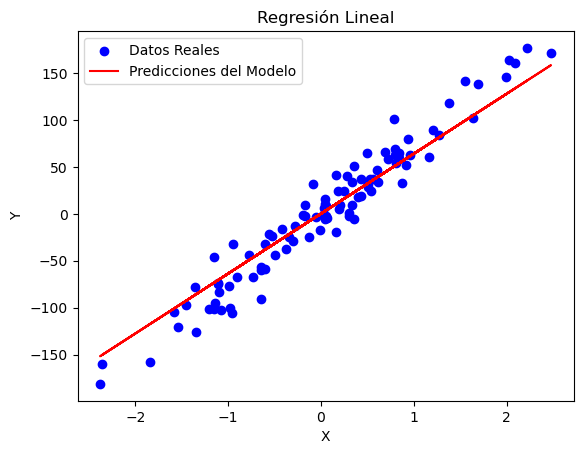

In [30]:
import torch 
import torch.nn as nn  
import numpy as np  
from sklearn import datasets  
import matplotlib.pyplot as plt  

# Paso 0: Preparar los datos
# Generamos un conjunto de datos de regresión con 100 muestras, 1 característica y un poco de ruido.
# Los datos se generan usando datasets.make_regression(), que simula una relación lineal con algo de ruido.
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# Convertimos los datos de NumPy a tensores de PyTorch (tipo float).
X = torch.from_numpy(X_numpy.astype(np.float32))  # Datos de entrada como tensor.
y = torch.from_numpy(y_numpy.astype(np.float32))  # Valores de salida como tensor.
y = y.view(y.shape[0], 1)  # Aseguramos que 'y' tenga forma de columna (100x1).

# Obtenemos el número de muestras y características.
n_samples, n_features = X.shape

# Paso 1: Diseñar el modelo
# Creamos un modelo lineal: f = wx + b, donde 'w' es el peso y 'b' es el sesgo.
input_size = n_features  # Número de características de entrada (en este caso, 1).
output_size = 1  # Número de características de salida (también 1).
model = nn.Linear(input_size, output_size)  # Creamos el modelo lineal.

# Paso 2: Definir la función de pérdida y el optimizador
learning_rate = 0.01  # Tasa de aprendizaje, controla el tamaño de los pasos al actualizar los pesos.

# Usamos el Error Cuadrático Medio (MSE) como función de pérdida.
criterion = nn.MSELoss()  
# Usamos el optimizador Stochastic Gradient Descent (SGD) para actualizar los parámetros del modelo.
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Paso 3: Bucle de entrenamiento
num_epochs = 100  # Número de épocas, cuántas veces pasamos por el conjunto de datos.
for epoch in range(num_epochs):
    # Paso 3.1: Hacemos la predicción (forward pass).
    y_predicted = model(X)  # El modelo predice los valores de 'y' basados en 'X'.
    
    # Paso 3.2: Calculamos la pérdida.
    loss = criterion(y_predicted, y)  # Comparamos las predicciones con los valores reales.
    
    # Paso 3.3: Calculamos los gradientes (backward pass).
    loss.backward()  # Calculamos automáticamente los gradientes con respecto a la pérdida.
    
    # Paso 3.4: Actualizamos los pesos del modelo.
    optimizer.step()  # Actualizamos los parámetros del modelo usando los gradientes.

    # Reiniciamos los gradientes para evitar acumulación en la siguiente iteración.
    optimizer.zero_grad()  

    # Imprimimos el progreso cada 10 épocas.
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')  # Mostramos la pérdida actual.

# Paso 4: Visualizar los resultados
predicted = model(X).detach().numpy()  # Obtenemos las predicciones del modelo y convertimos a NumPy.

# Creamos un gráfico para comparar los datos reales y las predicciones.
plt.scatter(X_numpy, y_numpy, color='blue', label='Datos Reales')  # Graficamos los datos reales en azul.
plt.plot(X_numpy, predicted, color='red', label='Predicciones del Modelo')  # Graficamos las predicciones en rojo.
plt.xlabel('X')  # Etiqueta del eje X.
plt.ylabel('Y')  # Etiqueta del eje Y.
plt.title('Regresión Lineal')  # Título del gráfico.
plt.legend()  # Mostramos la leyenda.
plt.show()  # Mostramos el gráfico.


### Regresión logística

In [31]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Paso 0: Preparar los datos
# Cargamos el conjunto de datos de cáncer de mama.
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target  # X son las características, y son las etiquetas (0 o 1).

# Obtenemos el número de muestras y características.
n_samples, n_features = X.shape

# Dividimos los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Escalamos los datos (normalización) para mejorar la convergencia del modelo.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # Ajustamos el escalador y transformamos los datos de entrenamiento.
X_test = sc.transform(X_test)  # Transformamos los datos de prueba con el mismo escalador.

# Convertimos los datos a tensores de PyTorch (tipo float).
X_train = torch.from_numpy(X_train.astype(np.float32))  # Datos de entrada de entrenamiento como tensor.
X_test = torch.from_numpy(X_test.astype(np.float32))  # Datos de entrada de prueba como tensor.
y_train = torch.from_numpy(y_train.astype(np.float32))  # Etiquetas de entrenamiento como tensor.
y_test = torch.from_numpy(y_test.astype(np.float32))  # Etiquetas de prueba como tensor.

# Aseguramos que 'y_train' y 'y_test' tengan la forma adecuada (número de muestras, 1).
y_train = y_train.view(y_train.shape[0], 1)  
y_test = y_test.view(y_test.shape[0], 1)  

# Paso 1: Diseñar el modelo
# Creamos un modelo lineal con función sigmoide al final para clasificar las salidas entre 0 y 1.
class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)  # Capa lineal con 'n_input_features' de entrada y 1 salida.

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))  # Aplicamos la función sigmoide a la salida de la capa lineal.
        return y_pred

model = Model(n_features)  # Instanciamos el modelo con el número de características.

# Paso 2: Definir la función de pérdida y el optimizador
num_epochs = 100  # Número de épocas para el entrenamiento.
learning_rate = 0.01  # Tasa de aprendizaje, controla el tamaño de los pasos al actualizar los pesos.

# Usamos la función de pérdida de entropía cruzada binaria (BCELoss) para clasificación binaria.
criterion = nn.BCELoss()  
# Usamos el optimizador Stochastic Gradient Descent (SGD) para actualizar los parámetros del modelo.
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Paso 3: Bucle de entrenamiento
for epoch in range(num_epochs):
    # Paso 3.1: Hacemos la predicción (forward pass).
    y_pred = model(X_train)  # El modelo predice los valores de 'y' basados en 'X_train'.
    
    # Paso 3.2: Calculamos la pérdida.
    loss = criterion(y_pred, y_train)  # Comparamos las predicciones con los valores reales.

    # Paso 3.3: Calculamos los gradientes (backward pass).
    loss.backward()  # Calculamos automáticamente los gradientes con respecto a la pérdida.
    
    # Paso 3.4: Actualizamos los pesos del modelo.
    optimizer.step()  # Actualizamos los parámetros del modelo usando los gradientes.

    # Reiniciamos los gradientes para evitar acumulación en la siguiente iteración.
    optimizer.zero_grad()  

    # Imprimimos el progreso cada 10 épocas.
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')  # Mostramos la pérdida actual.

# Evaluación sin calcular gradientes
with torch.no_grad():
    y_predicted = model(X_test)  # Usamos el modelo para predecir los valores de 'y_test'.
    y_predicted_cls = y_predicted.round()  # Convertimos las probabilidades a clases (0 o 1) redondeando.    
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])  # Calcula la precisión comparando las predicciones con las etiquetas verdaderas.
    print(f'accuracy: {acc.item():.4f}')  # Imprime la precisión del modelo en el conjunto de prueba.

epoch: 10, loss = 0.4652
epoch: 20, loss = 0.4018
epoch: 30, loss = 0.3576
epoch: 40, loss = 0.3250
epoch: 50, loss = 0.2997
epoch: 60, loss = 0.2795
epoch: 70, loss = 0.2630
epoch: 80, loss = 0.2491
epoch: 90, loss = 0.2372
epoch: 100, loss = 0.2269
accuracy: 0.9211


### Softmax y Crossentropy

In [32]:
import torch
import torch.nn as nn
import numpy as np

# Representación de un flujo de datos en una red neuronal
#        -> 2.0              -> 0.65  
# Linear -> 1.0  -> Softmax  -> 0.25   -> CrossEntropy(y, y_hat)
#        -> 0.1              -> 0.1                   
#
#     scores(logits)      probabilities
#                           sum = 1.0
#

# La función Softmax aplica la función exponencial a cada elemento y normaliza
# dividiendo por la suma de todas estas exponenciales
# -> comprime la salida para que esté entre 0 y 1 = probabilidad
# la suma de todas las probabilidades es 1
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)  # Devuelve las probabilidades usando Softmax.

# Ejemplo de uso con NumPy
x = np.array([2.0, 1.0, 0.1])  # Datos de entrada.
outputs = softmax(x)  # Aplica la función Softmax.
print('softmax numpy:', outputs)  # Imprime las probabilidades calculadas.

# Ejemplo de uso con PyTorch
x = torch.tensor([2.0, 1.0, 0.1])  # Datos de entrada como tensor.
outputs = torch.softmax(x, dim=0)  # Aplica la función Softmax en PyTorch.
print('softmax torch:', outputs)  # Imprime las probabilidades calculadas.

# Entropía cruzada
# La pérdida de entropía cruzada, o pérdida logarítmica, mide el rendimiento de un modelo de clasificación 
# cuya salida es un valor de probabilidad entre 0 y 1. 
# -> la pérdida aumenta a medida que la probabilidad predicha se desvía de la etiqueta real
def cross_entropy(actual, predicted):
    EPS = 1e-15  # Para evitar problemas de log(0)
    predicted = np.clip(predicted, EPS, 1 - EPS)  # Recorta las predicciones para evitar log(0).
    loss = -np.sum(actual * np.log(predicted))  # Calcula la pérdida de entropía cruzada.
    return loss  # Devuelve la pérdida.

# y debe estar codificado en one-hot
# si la clase es 0: [1 0 0]
# si la clase es 1: [0 1 0]
# si la clase es 2: [0 0 1]
Y = np.array([1, 0, 0])  # Etiqueta real en formato one-hot.
Y_pred_good = np.array([0.7, 0.2, 0.1])  # Predicción buena.
Y_pred_bad = np.array([0.1, 0.3, 0.6])   # Predicción mala.
l1 = cross_entropy(Y, Y_pred_good)  # Calcula la pérdida para la predicción buena.
l2 = cross_entropy(Y, Y_pred_bad)  # Calcula la pérdida para la predicción mala.
print(f'Loss1 numpy: {l1:.4f}')  # Imprime la pérdida de la predicción buena.
print(f'Loss2 numpy: {l2:.4f}')  # Imprime la pérdida de la predicción mala.

# CrossEntropyLoss en PyTorch (aplica Softmax)
# nn.LogSoftmax + nn.NLLLoss
# NLLLoss = pérdida de verosimilitud negativa
loss = nn.CrossEntropyLoss()  # Inicializa la función de pérdida de entropía cruzada.

# Y (=target) contiene etiquetas de clase, no one-hot
Y = torch.tensor([0])  # Etiqueta de clase real como tensor.

# input es de tamaño nSamples x nClasses = 1 x 3
# y_pred (=input) debe ser logits, es decir, las puntuaciones sin normalizar para cada clase
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]])  # Predicción buena como tensor.
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])  # Predicción mala como tensor.
l1 = loss(Y_pred_good, Y)  # Calcula la pérdida para la predicción buena.
l2 = loss(Y_pred_bad, Y)  # Calcula la pérdida para la predicción mala.

print(f'PyTorch Loss1: {l1.item():.4f}')  # Imprime la pérdida de la predicción buena.
print(f'PyTorch Loss2: {l2.item():.4f}')  # Imprime la pérdida de la predicción mala.

# Obtener predicciones
_, predictions1 = torch.max(Y_pred_good, 1)  # Obtiene la clase con mayor probabilidad de la predicción buena.
_, predictions2 = torch.max(Y_pred_bad, 1)  # Obtiene la clase con mayor probabilidad de la predicción mala.
print(f'Actual class: {Y.item()}, Y_pred1: {predictions1.item()}, Y_pred2: {predictions2.item()}')  # Imprime la clase real y las predicciones.

# Permite calcular la pérdida para múltiples muestras en un lote.

# Y es de tamaño nBatch = 3
# cada elemento tiene etiqueta de clase: 0, 1 o 2
Y = torch.tensor([2, 0, 1])  # Etiquetas de clase reales en un lote.

# input es de tamaño nBatch x nClasses = 3 x 3
# Y_pred son logits (no softmax)
Y_pred_good = torch.tensor(
    [[0.1, 0.2, 3.9],  # predice clase 2
     [1.2, 0.1, 0.3],  # predice clase 0
     [0.3, 2.2, 0.2]])  # predice clase 1

Y_pred_bad = torch.tensor(
    [[0.9, 0.2, 0.1],  # predice clase 0
     [0.1, 0.3, 1.5],  # predice clase 2
     [1.2, 0.2, 0.5]])  # predice clase 0

l1 = loss(Y_pred_good, Y)  # Calcula la pérdida para la predicción buena en un lote.
l2 = loss(Y_pred_bad, Y)  # Calcula la pérdida para la predicción mala en un lote.
print(f'Batch Loss1:  {l1.item():.4f}')  # Imprime la pérdida de la predicción buena en un lote.
print(f'Batch Loss2: {l2.item():.4f}')  # Imprime la pérdida de la predicción mala en un lote.

# Obtener predicciones
_, predictions1 = torch.max(Y_pred_good, 1)  # Obtiene la clase con mayor probabilidad de la predicción buena en el lote.
_, predictions2 = torch.max(Y_pred_bad, 1)  # Obtiene la clase con mayor probabilidad de la predicción mala en el lote.
print(f'Actual class: {Y}, Y_pred1: {predictions1}, Y_pred2: {predictions2}')  # Imprime las clases reales y las predicciones.

# Clasificación binaria
class NeuralNet1(nn.Module):  # Definición de una red neuronal para clasificación binaria.
    def __init__(self, input_size, hidden_size):
        super(NeuralNet1, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)  # Capa lineal de entrada a oculta.
        self.relu = nn.ReLU()  # Función de activación ReLU.
        self.linear2 = nn.Linear(hidden_size, 1)  # Capa lineal de oculta a salida.

    def forward(self, x):
        out = self.linear1(x)  # Cálculo de la capa lineal.
        out = self.relu(out)  # Aplicación de la función de activación.
        out = self.linear2(out)  # Cálculo de la salida.
        # Sigmoid al final
        y_pred = torch.sigmoid(out)  # Aplica sigmoid para obtener probabilidades.
        return y_pred  # Devuelve las probabilidades predichas.

model = NeuralNet1(input_size=28*28, hidden_size=5)  # Inicializa el modelo para datos de entrada de 28x28 y 5 neuronas ocultas.
criterion = nn.BCELoss()  # Inicializa la función de pérdida de entropía cruzada binaria.

# Problema multiclasificación
class NeuralNet2(nn.Module):  # Definición de una red neuronal para clasificación multiclase.
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)  # Capa lineal de entrada a oculta.
        self.relu = nn.ReLU()  # Función de activación ReLU.
        self.linear2 = nn.Linear(hidden_size, num_classes)  # Capa lineal de oculta a salida.

    def forward(self, x):
        out = self.linear1


softmax numpy: [0.65900114 0.24243297 0.09856589]
softmax torch: tensor([0.6590, 0.2424, 0.0986])
Loss1 numpy: 0.3567
Loss2 numpy: 2.3026
PyTorch Loss1: 0.4170
PyTorch Loss2: 1.8406
Actual class: 0, Y_pred1: 0, Y_pred2: 1
Batch Loss1:  0.2834
Batch Loss2: 1.6418
Actual class: tensor([2, 0, 1]), Y_pred1: tensor([2, 0, 1]), Y_pred2: tensor([0, 2, 0])


### Funciones de activación

In [33]:
import torch.nn.functional as F  # Funciones útiles para operaciones en redes neuronales

# Creamos un tensor con algunos valores. Este tensor representa una entrada a la red neuronal.
x = torch.tensor([-1.0, 1.0, 2.0, 3.0])

# Aplicamos la función de activación Softmax
# Softmax convierte los valores en probabilidades que suman 1.
output = torch.softmax(x, dim=0)  # Aquí estamos aplicando softmax a lo largo del primer eje
print(output)  # Imprimimos el resultado

# También podemos usar la clase Softmax de nn
sm = nn.Softmax(dim=0)  # Creamos una instancia de la clase Softmax
output = sm(x)  # Aplicamos softmax a nuestro tensor
print(output)  # Imprimimos el resultado

# Aplicamos la función de activación Sigmoid
# Sigmoid convierte los valores en un rango entre 0 y 1.
output = torch.sigmoid(x)  # Usamos la función sigmoid directamente
print(output)  # Imprimimos el resultado

# También podemos usar la clase Sigmoid de nn
s = nn.Sigmoid()  # Creamos una instancia de la clase Sigmoid
output = s(x)  # Aplicamos sigmoid a nuestro tensor
print(output)  # Imprimimos el resultado

# Aplicamos la función de activación Tanh
# Tanh normaliza los valores entre -1 y 1.
output = torch.tanh(x)  # Usamos la función tanh directamente
print(output)  # Imprimimos el resultado

# También podemos usar la clase Tanh de nn
t = nn.Tanh()  # Creamos una instancia de la clase Tanh
output = t(x)  # Aplicamos tanh a nuestro tensor
print(output)  # Imprimimos el resultado

# Aplicamos la función de activación ReLU
# ReLU convierte cualquier valor negativo a cero y deja los positivos igual.
output = torch.relu(x)  # Usamos la función relu directamente
print(output)  # Imprimimos el resultado

# También podemos usar la clase ReLU de nn
relu = nn.ReLU()  # Creamos una instancia de la clase ReLU
output = relu(x)  # Aplicamos relu a nuestro tensor
print(output)  # Imprimimos el resultado

# Aplicamos la función de activación Leaky ReLU
# Leaky ReLU permite un pequeño gradiente cuando el valor es negativo.
output = F.leaky_relu(x)  # Usamos la función leaky relu directamente
print(output)  # Imprimimos el resultado

# También podemos usar la clase LeakyReLU de nn
lrelu = nn.LeakyReLU()  # Creamos una instancia de la clase Leaky ReLU
output = lrelu(x)  # Aplicamos leaky relu a nuestro tensor
print(output)  # Imprimimos el resultado

# En este punto, hemos visto cómo aplicar diferentes funciones de activación a tensores.

# Ahora, veremos dos opciones para crear una red neuronal simple.

# Opción 1: Crear módulos de red neuronal
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        # Creamos la primera capa lineal que toma el tamaño de entrada y lo transforma a un tamaño oculto.
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()  # Usamos ReLU como función de activación
        # Creamos la segunda capa lineal que toma el tamaño oculto y produce una salida de tamaño 1.
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()  # Usamos Sigmoid para la salida final

    def forward(self, x):
        out = self.linear1(x)  # Pasamos los datos por la primera capa
        out = self.relu(out)  # Aplicamos ReLU
        out = self.linear2(out)  # Pasamos por la segunda capa
        out = self.sigmoid(out)  # Aplicamos Sigmoid a la salida final
        return out  # Retornamos la salida de la red

# Opción 2: Usar funciones de activación directamente en el paso hacia adelante
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        # Creamos la primera capa lineal
        self.linear1 = nn.Linear(input_size, hidden_size)
        # Creamos la segunda capa lineal
        self.linear2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        # Aplicamos la función de activación ReLU directamente en la salida de la primera capa
        out = torch.relu(self.linear1(x))
        # Aplicamos la función de activación Sigmoid en la salida de la segunda capa
        out = torch.sigmoid(self.linear2(out))
        return out  # Retornamos la salida de la red


tensor([0.0120, 0.0889, 0.2418, 0.6572])
tensor([0.0120, 0.0889, 0.2418, 0.6572])
tensor([0.2689, 0.7311, 0.8808, 0.9526])
tensor([0.2689, 0.7311, 0.8808, 0.9526])
tensor([-0.7616,  0.7616,  0.9640,  0.9951])
tensor([-0.7616,  0.7616,  0.9640,  0.9951])
tensor([0., 1., 2., 3.])
tensor([0., 1., 2., 3.])
tensor([-0.0100,  1.0000,  2.0000,  3.0000])
tensor([-0.0100,  1.0000,  2.0000,  3.0000])


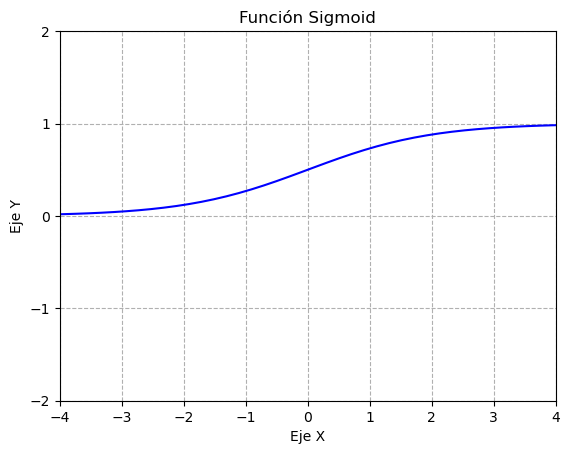

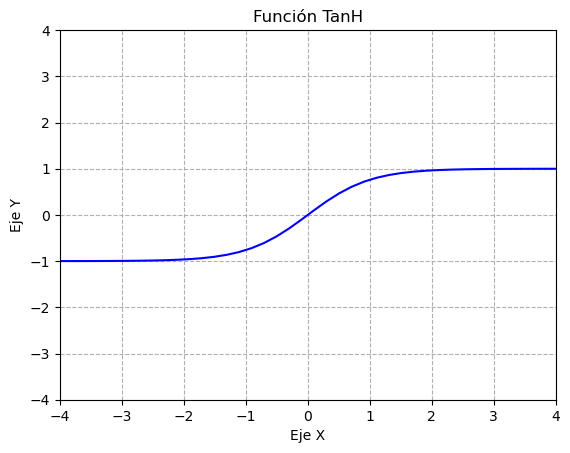

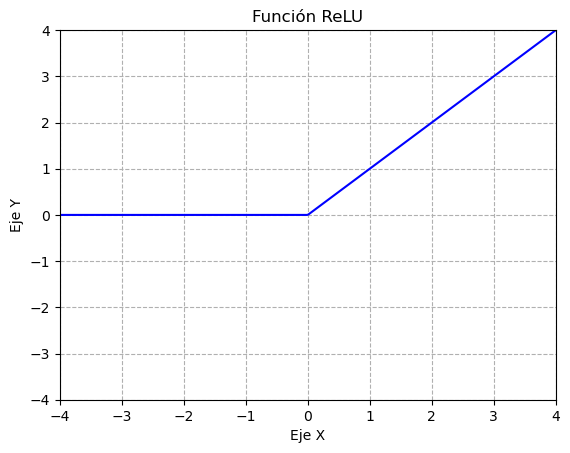

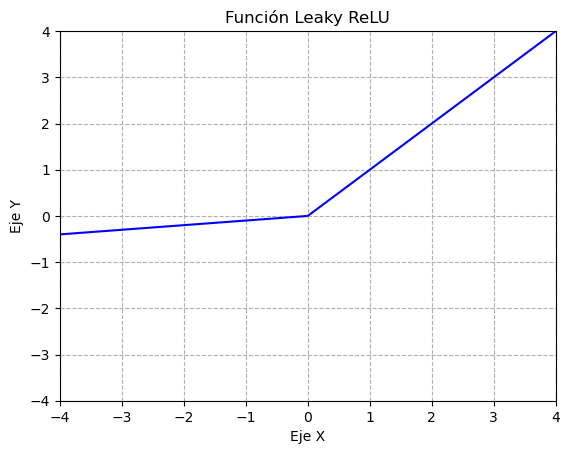

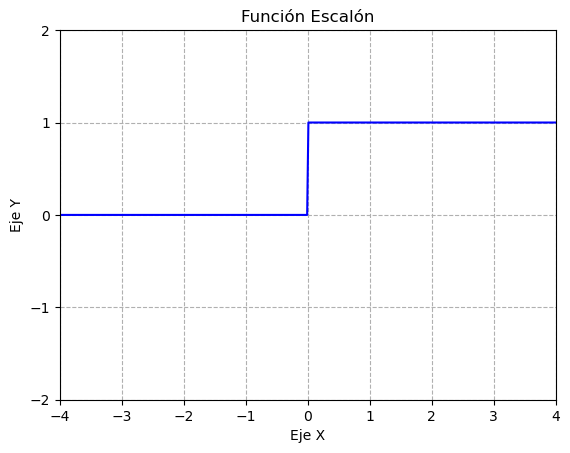

done


In [34]:
# Definimos la función Sigmoid
sigmoid = lambda x: 1 / (1 + np.exp(-x))  # La función Sigmoid se define aquí

# Creamos un rango de valores para x desde -10 hasta 10 con 10 puntos
x = np.linspace(-10, 10, 10)
# Creamos un rango de valores más fino para y desde -10 hasta 10 con 100 puntos
y = np.linspace(-10, 10, 100)

# Creamos una figura para el gráfico
fig = plt.figure()
# Graficamos la función Sigmoid
plt.plot(y, sigmoid(y), 'b', label='linspace(-10,10,100)')

# Añadimos una cuadrícula al gráfico
plt.grid(linestyle='--')

# Etiquetas para los ejes
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

# Título del gráfico
plt.title('Función Sigmoid')

# Definimos las marcas en el eje X
plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
# Definimos las marcas en el eje Y
plt.yticks([-2, -1, 0, 1, 2])

# Establecemos los límites del eje Y
plt.ylim(-2, 2)
# Establecemos los límites del eje X
plt.xlim(-4, 4)

# Mostramos el gráfico
plt.show()
#plt.savefig('sigmoid.png')  # Guardamos el gráfico como una imagen (opcional)

# Creamos otra figura para la función TanH
fig = plt.figure()

# Definimos la función TanH usando la función Sigmoid
tanh = lambda x: 2 * sigmoid(2 * x) - 1  # TanH se basa en la función Sigmoid

# Repetimos el proceso para crear y graficar la función TanH
x = np.linspace(-10, 10, 10)
y = np.linspace(-10, 10, 100)

plt.plot(y, tanh(y), 'b', label='linspace(-10,10,100)')
plt.grid(linestyle='--')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Función TanH')
plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.ylim(-4, 4)
plt.xlim(-4, 4)
plt.show()
#plt.savefig('tanh.png')  # Guardamos el gráfico como una imagen (opcional)

# Creamos otra figura para la función ReLU
fig = plt.figure()

# Definimos la función ReLU
relu = lambda x: np.where(x >= 0, x, 0)  # ReLU devuelve 0 para valores negativos

# Repetimos el proceso para crear y graficar la función ReLU
x = np.linspace(-10, 10, 10)
y = np.linspace(-10, 10, 1000)

plt.plot(y, relu(y), 'b', label='linspace(-10,10,100)')
plt.grid(linestyle='--')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Función ReLU')
plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.ylim(-4, 4)
plt.xlim(-4, 4)
plt.show()
#plt.savefig('relu.png')  # Guardamos el gráfico como una imagen (opcional)

# Creamos otra figura para la función Leaky ReLU
fig = plt.figure()

# Definimos la función Leaky ReLU
leakyrelu = lambda x: np.where(x >= 0, x, 0.1 * x)  # Leaky ReLU permite un pequeño gradiente

# Repetimos el proceso para crear y graficar la función Leaky ReLU
x = np.linspace(-10, 10, 10)
y = np.linspace(-10, 10, 1000)

plt.plot(y, leakyrelu(y), 'b', label='linspace(-10,10,100)')
plt.grid(linestyle='--')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Función Leaky ReLU')
plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.ylim(-4, 4)
plt.xlim(-4, 4)
plt.show()
#plt.savefig('lrelu.png')  # Guardamos el gráfico como una imagen (opcional)

# Creamos otra figura para la función escalón
fig = plt.figure()

# Definimos la función escalón
bstep = lambda x: np.where(x >= 0, 1, 0)  # La función escalón devuelve 1 para valores no negativos

# Repetimos el proceso para crear y graficar la función escalón
x = np.linspace(-10, 10, 10)
y = np.linspace(-10, 10, 1000)

plt.plot(y, bstep(y), 'b', label='linspace(-10,10,100)')
plt.grid(linestyle='--')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Función Escalón')
plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-2, -1, 0, 1, 2])
plt.ylim(-2, 2)
plt.xlim(-4, 4)
plt.show()
#plt.savefig('step.png')  # Guardamos el gráfico como una imagen (opcional)

# Imprimimos 'done' para indicar que todo ha terminado
print('done')


### Teorema de Bayes

In [35]:
# Definimos las probabilidades
P_E = 0.01  # P(E): probabilidad de tener la enfermedad
P_S_given_E = 0.9  # P(S|E): probabilidad de observar el síntoma dado que tiene la enfermedad
P_S_given_not_E = 0.1  # P(S|¬E): probabilidad de observar el síntoma dado que NO tiene la enfermedad

# Calcular P(S): probabilidad total del síntoma
P_not_E = 1 - P_E  # P(¬E): probabilidad de no tener la enfermedad
P_S = P_S_given_E * P_E + P_S_given_not_E * P_not_E  # P(S)

# Aplicamos el teorema de Bayes
P_E_given_S = (P_S_given_E * P_E) / P_S  # P(E|S): probabilidad de tener la enfermedad dado el síntoma

# Resultados
print(f"Probabilidad de tener la enfermedad dado el síntoma: {P_E_given_S:.4f}")

Probabilidad de tener la enfermedad dado el síntoma: 0.0833


### Support Vector Machine

In [36]:
# Importamos las bibliotecas necesarias
import torch  # Biblioteca para manejo de tensores
import numpy as np  # Biblioteca para operaciones numéricas
import pandas as pd  # Biblioteca para manejo de datos en formato de tablas
from sklearn.datasets import load_iris  # Para cargar el conjunto de datos de Iris
from sklearn.model_selection import train_test_split  # Para dividir los datos en entrenamiento y prueba
from sklearn.svm import SVC  # Implementación del clasificador SVM
from sklearn.metrics import accuracy_score  # Para calcular la precisión del modelo

# Cargar el conjunto de datos de Iris
iris = load_iris()  # Cargamos el conjunto de datos
X = iris.data  # Las características (atributos) de las flores
y = iris.target  # Las clases (especies) de las flores

# Convertimos los datos a un DataFrame de pandas para un manejo más fácil
data = pd.DataFrame(X, columns=iris.feature_names)  # Creamos un DataFrame con las características
data['target'] = y  # Añadimos la columna de las clases al DataFrame

# Mostramos las primeras filas del conjunto de datos
print("Primeras filas del conjunto de datos:")
print(data.head())  # Muestra las primeras 5 filas del DataFrame

# Dividir los datos en conjuntos de entrenamiento y prueba
# Usamos el 80% de los datos para entrenar y el 20% para probar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertimos los datos a tensores de PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)  # Tensor para las características de entrenamiento
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)  # Tensor para las características de prueba
y_train_tensor = torch.tensor(y_train, dtype=torch.int64)  # Tensor para las clases de entrenamiento
y_test_tensor = torch.tensor(y_test, dtype=torch.int64)  # Tensor para las clases de prueba

# Crear el modelo SVM
# Usamos un clasificador SVM con un kernel lineal
svm_model = SVC(kernel='linear')

# Entrenar el modelo
# El modelo se ajusta a los datos de entrenamiento
svm_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Evaluar el modelo calculando la precisión
# Comparamos las predicciones con las clases reales del conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo SVM: {accuracy:.4f}")  # Imprimimos la precisión del modelo


Primeras filas del conjunto de datos:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
Precisión del modelo SVM: 1.0000


### K Nearest Neighbours

In [37]:
import torch
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris  # Para cargar el conjunto de datos de Iris
from sklearn.model_selection import train_test_split  # Para dividir los datos en entrenamiento y prueba
from sklearn.neighbors import KNeighborsClassifier  # Implementación del clasificador KNN
from sklearn.metrics import accuracy_score  # Para calcular la precisión del modelo

# Cargar el conjunto de datos de Iris
iris = load_iris()  # Cargamos el conjunto de datos
X = iris.data  # Las características (atributos) de las flores
y = iris.target  # Las clases (especies) de las flores

# Convertimos los datos a un DataFrame de pandas para un manejo más fácil
data = pd.DataFrame(X, columns=iris.feature_names)  # Creamos un DataFrame con las características
data['target'] = y  # Añadimos la columna de las clases al DataFrame

# Mostramos las primeras filas del conjunto de datos
print("Primeras filas del conjunto de datos:")
print(data.head())  # Muestra las primeras 5 filas del DataFrame

# Dividir los datos en conjuntos de entrenamiento y prueba
# Usamos el 80% de los datos para entrenar y el 20% para probar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertimos los datos a tensores de PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)  # Tensor para las características de entrenamiento
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)  # Tensor para las características de prueba
y_train_tensor = torch.tensor(y_train, dtype=torch.int64)  # Tensor para las clases de entrenamiento
y_test_tensor = torch.tensor(y_test, dtype=torch.int64)  # Tensor para las clases de prueba

# Crear el modelo de KNN
# Usaremos 5 vecinos más cercanos (k=5)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo
# El modelo se ajusta a los datos de entrenamiento
knn_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn_model.predict(X_test)

# Evaluar el modelo calculando la precisión
# Comparamos las predicciones con las clases reales del conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo KNN: {accuracy:.4f}")  # Imprimimos la precisión del modelo


Primeras filas del conjunto de datos:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
Precisión del modelo KNN: 1.0000


### Random Forest

In [38]:
import torch
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris  # Para cargar el conjunto de datos de Iris
from sklearn.model_selection import train_test_split  # Para dividir los datos en entrenamiento y prueba
from sklearn.ensemble import RandomForestClassifier  # Implementación del clasificador Random Forest
from sklearn.metrics import accuracy_score  # Para calcular la precisión del modelo

# Cargar el conjunto de datos de Iris
iris = load_iris()  # Cargamos el conjunto de datos
X = iris.data  # Las características (atributos) de las flores
y = iris.target  # Las clases (especies) de las flores

# Convertimos los datos a un DataFrame de pandas para un manejo más fácil
data = pd.DataFrame(X, columns=iris.feature_names)  # Creamos un DataFrame con las características
data['target'] = y  # Añadimos la columna de las clases al DataFrame

# Mostramos las primeras filas del conjunto de datos
print("Primeras filas del conjunto de datos:")
print(data.head())  # Muestra las primeras 5 filas del DataFrame

# Dividir los datos en conjuntos de entrenamiento y prueba
# Usamos el 80% de los datos para entrenar y el 20% para probar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertimos los datos a tensores de PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)  # Tensor para las características de entrenamiento
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)  # Tensor para las características de prueba
y_train_tensor = torch.tensor(y_train, dtype=torch.int64)  # Tensor para las clases de entrenamiento
y_test_tensor = torch.tensor(y_test, dtype=torch.int64)  # Tensor para las clases de prueba

# Crear el modelo de Random Forest
# El número de estimadores (árboles) se establece en 100
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
# El modelo se ajusta a los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Evaluar el modelo calculando la precisión
# Comparamos las predicciones con las clases reales del conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.4f}")  # Imprimimos la precisión del modelo


Primeras filas del conjunto de datos:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
Precisión del modelo: 1.0000


### Red Neuronal Básica

Linear(in_features=2, out_features=8, bias=False)
Salida de M1: tensor([[ 4.0002,  2.0992, -1.9444,  3.9759,  1.2679, -2.3396,  3.3210, -4.0740],
        [ 3.4743,  1.6821, -1.6300,  3.5318,  0.9266, -1.9028,  2.7933, -3.5006],
        [ 1.7933, -0.1884, -0.4009,  2.4111, -0.8283, -0.0154,  0.7598, -1.5236],
        [ 6.2160,  1.7089, -2.3741,  7.0427,  0.0498, -2.2145,  4.1581, -5.9143]],
       grad_fn=<MmBackward0>)
Linear(in_features=8, out_features=1, bias=False)
Salida de M2: tensor([-0.8078, -0.6526,  0.0296, -0.7166], grad_fn=<SqueezeBackward0>)
Salida esperada (y): tensor([1., 5., 2., 5.])
Predicciones (yhat): tensor([-0.9002, -0.8480, -0.9326, -2.1263], grad_fn=<SqueezeBackward0>)
Salida esperada (y): tensor([1., 5., 2., 5.])
Pérdida inicial: 24.29840850830078
Pérdida calculada manualmente: 24.29840850830078


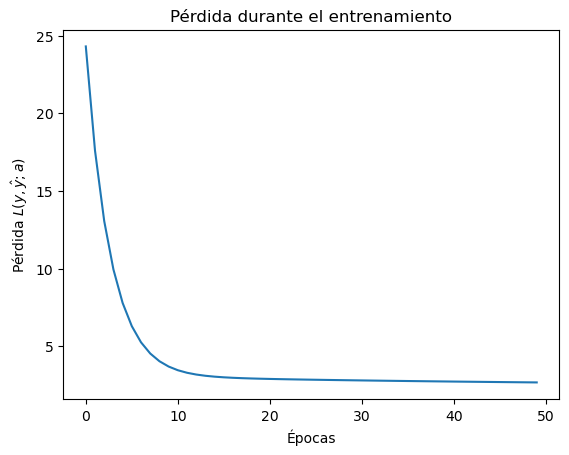

Predicciones finales (f(x)): tensor([3.3581, 2.8817, 1.2255, 4.8333], grad_fn=<SqueezeBackward0>)
Salida esperada (y): tensor([1., 5., 2., 5.])


In [39]:
import torch
import torch.nn as nn  # Módulo de redes neuronales en PyTorch
from torch.optim import SGD  # Algoritmo de optimización Stochastic Gradient Descent
import numpy as np  # Biblioteca para operaciones numéricas
import matplotlib.pyplot as plt  # Biblioteca para visualización de gráficos

# Definimos los datos de entrada (x) y salida (y)
x = torch.tensor([[6, 2], [5, 2], [1, 3], [7, 6]]).float()  # Datos de entrada
y = torch.tensor([1, 5, 2, 5]).float()  # Datos de salida esperada

# Definimos la primera capa de la red neuronal (M1)
M1 = nn.Linear(2, 8, bias=False)  # Capa que toma 2 entradas y produce 8 salidas
print(M1)  # Mostramos la estructura de la capa

# Aplicamos la primera capa a los datos de entrada
output_M1 = M1(x)  # Pasamos x a través de M1
print("Salida de M1:", output_M1)  # Mostramos la salida de M1

# Definimos la segunda capa de la red neuronal (M2)
M2 = nn.Linear(8, 1, bias=False)  # Capa que toma 8 entradas y produce 1 salida
print(M2)  # Mostramos la estructura de la capa

# Aplicamos la segunda capa a la salida de la primera capa
output_M2 = M2(output_M1).squeeze()  # Pasamos la salida de M1 a través de M2 y eliminamos dimensiones extra
print("Salida de M2:", output_M2)  # Mostramos la salida de M2

# Mostramos los datos de salida esperada
print("Salida esperada (y):", y)  # Mostramos los valores reales de y

# Definimos nuestra propia red neuronal
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        # Inicializamos las capas de la red
        self.Matrix1 = nn.Linear(2, 8, bias=False)  # Primera capa
        self.Matrix2 = nn.Linear(8, 1, bias=False)  # Segunda capa

    def forward(self, x):
        # Definimos cómo se pasa la entrada a través de la red
        x = self.Matrix1(x)  # Aplicamos la primera capa
        x = self.Matrix2(x)  # Aplicamos la segunda capa
        return x.squeeze()  # Retornamos la salida eliminando dimensiones extra

# Creamos una instancia de nuestra red neuronal
f = MyNeuralNet()  # Inicializamos el modelo

# Hacemos una predicción usando la red neuronal
yhat = f(x)  # Pasamos los datos de entrada a través de la red
print("Predicciones (yhat):", yhat)  # Mostramos las predicciones

# Mostramos los datos de salida esperada
print("Salida esperada (y):", y)  # Mostramos los valores reales de y

# Definimos la función de pérdida (loss function)
L = nn.MSELoss()  # Mean Squared Error (MSE) como función de pérdida
loss_value = L(y, yhat)  # Calculamos la pérdida entre las predicciones y las salidas reales
print("Pérdida inicial:", loss_value.item())  # Mostramos el valor de la pérdida

# Calculamos la pérdida manualmente para verificar
manual_loss = torch.mean((y - yhat) ** 2)  # Cálculo manual de la pérdida MSE
print("Pérdida calculada manualmente:", manual_loss.item())  # Mostramos el valor de la pérdida calculada manualmente

# Configuramos el optimizador
opt = SGD(f.parameters(), lr=0.001)  # Usamos el optimizador SGD con una tasa de aprendizaje de 0.001

# Lista para almacenar las pérdidas en cada época
losses = []
for _ in range(50):  # Entrenamos el modelo durante 50 épocas
    opt.zero_grad()  # Limpiamos el gradiente del optimizador del paso anterior
    loss_value = L(f(x), y)  # Calculamos la pérdida para la predicción actual
    loss_value.backward()  # Calculamos el gradiente de la pérdida
    opt.step()  # Actualizamos los parámetros del modelo
    losses.append(loss_value.item())  # Almacenamos el valor de la pérdida

# Visualizamos las pérdidas a lo largo de las épocas
plt.plot(losses)  # Graficamos la pérdida por época
plt.ylabel('Pérdida $L(y,\hat{y};a)$')  # Etiqueta del eje y
plt.xlabel('Épocas')  # Etiqueta del eje x
plt.title('Pérdida durante el entrenamiento')  # Título del gráfico
plt.show()  # Mostramos el gráfico

# Predicción final después del entrenamiento
final_predictions = f(x)  # Realizamos una predicción final
print("Predicciones finales (f(x)):", final_predictions)  # Mostramos las predicciones finales
print("Salida esperada (y):", y)  # Mostramos los valores reales de y


### Red Neuronal Profunda

Salida esperada (y): tensor([1., 5., 2., 5.])
Predicciones (f(x)): tensor([3.2638, 2.8198, 1.3437, 4.9073], grad_fn=<SqueezeBackward0>)
Tensor de entrada: tensor([[ 4,  6,  2, -1,  6,  2,  5],
        [ 1,  6,  2, -6,  5, -3,  5]])
Salida de ReLU: tensor([[4, 6, 2, 0, 6, 2, 5],
        [1, 6, 2, 0, 5, 0, 5]])


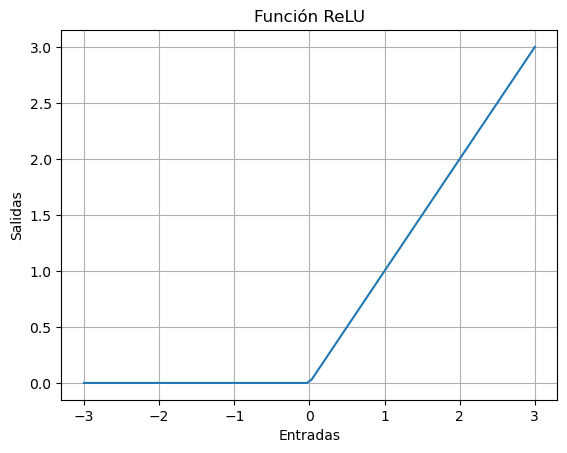

Salida esperada (y): tensor([1., 5., 2., 5.])
Predicciones (f2(x)): tensor([2.7503, 2.5854, 1.8542, 5.2768], grad_fn=<SqueezeBackward0>)
Salida esperada (y): tensor([1., 5., 2., 5.])
Predicciones (f3(x)): tensor([2.0208, 3.5897, 1.9184, 5.1303], grad_fn=<SqueezeBackward0>)
Salida esperada (y): tensor([1., 5., 2., 5.])
Predicciones (f4(x)): tensor([1.4777, 4.3559, 2.0017, 5.0495], grad_fn=<SqueezeBackward0>)
Salida esperada (y): tensor([1., 5., 2., 5.])
Predicciones (f5(x)): tensor([1.0003, 4.9995, 2.0000, 5.0000], grad_fn=<SqueezeBackward0>)


In [42]:
# Importamos las bibliotecas necesarias
import torch  # Biblioteca para el manejo de tensores
import torch.nn as nn  # Módulo de redes neuronales en PyTorch
from torch.optim import SGD  # Algoritmo de optimización Stochastic Gradient Descent
import numpy as np  # Biblioteca para operaciones numéricas
import matplotlib.pyplot as plt  # Biblioteca para visualización de gráficos

# Definimos los datos de entrada (x) y salida (y)
x = torch.tensor([[6, 2], [5, 2], [1, 3], [7, 6]]).float()  # Datos de entrada
y = torch.tensor([1, 5, 2, 5]).float()  # Datos de salida esperada

# Definimos la primera red neuronal
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2, 8, bias=False)  # Primera capa: 2 entradas, 8 salidas
        self.Matrix2 = nn.Linear(8, 1, bias=False)  # Segunda capa: 8 entradas, 1 salida
        
    def forward(self, x):
        x = self.Matrix1(x)  # Pasamos x a través de la primera capa
        x = self.Matrix2(x)  # Pasamos la salida a través de la segunda capa
        return x.squeeze()  # Eliminamos dimensiones extra y retornamos la salida

# Creamos una instancia de la red neuronal
f = MyNeuralNet()

# Configuramos el optimizador y la función de pérdida
opt = SGD(f.parameters(), lr=0.001)  # Usamos el optimizador SGD con una tasa de aprendizaje de 0.001
L = nn.MSELoss()  # Mean Squared Error (MSE) como función de pérdida

# Entrenamos el modelo
losses = []  # Lista para almacenar las pérdidas en cada época
for _ in range(50):  # Entrenamos durante 50 épocas
    opt.zero_grad()  # Limpiamos el gradiente del optimizador del paso anterior
    loss_value = L(f(x), y)  # Calculamos la pérdida
    loss_value.backward()  # Calculamos el gradiente de la pérdida
    opt.step()  # Actualizamos los parámetros del modelo
    losses.append(loss_value.item())  # Almacenamos el valor de la pérdida

# Mostramos los datos de salida esperada
print("Salida esperada (y):", y)

# Mostramos las predicciones iniciales
print("Predicciones (f(x)):", f(x))

# Definimos un tensor de entrada para aplicar la función de activación ReLU
x = torch.tensor([[4, 6, 2, -1, 6, 2, 5], [1, 6, 2, -6, 5, -3, 5]])
print("Tensor de entrada:", x)

# Creamos una instancia de la función de activación ReLU
R = nn.ReLU()  
print("Salida de ReLU:", R(x))  # Aplicamos ReLU al tensor de entrada

# Visualizamos la función ReLU
x = torch.linspace(-3, 3, 100)  # Creamos un rango de valores de -3 a 3
y = R(x)  # Aplicamos ReLU a los valores
plt.plot(x.numpy(), y.numpy())  # Graficamos la función ReLU
plt.grid()  # Añadimos una cuadrícula
plt.title('Función ReLU')  # Título del gráfico
plt.xlabel('Entradas')  # Etiqueta del eje x
plt.ylabel('Salidas')  # Etiqueta del eje y
plt.show()  # Mostramos el gráfico

# Definimos la segunda red neuronal que incluye la función de activación ReLU
class MyNeuralNet2(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2, 8, bias=False)  # Primera capa
        self.Matrix2 = nn.Linear(8, 1, bias=False)  # Segunda capa
        self.R = nn.ReLU()  # Función de activación ReLU
        
    def forward(self, x):
        x = self.R(self.Matrix1(x))  # Aplicamos la primera capa y luego ReLU
        x = self.Matrix2(x)  # Pasamos la salida a través de la segunda capa
        return x.squeeze()  # Eliminamos dimensiones extra y retornamos la salida

def train_model(x,y,f, n_epochs=50):
    opt = SGD(f.parameters(), lr=0.001)
    L = nn.MSELoss()
    
    # Entrenamos el modelo
    losses = []  # Lista para almacenar las pérdidas en cada época
    for _ in range(n_epochs):  # Entrenamos durante 50 épocas
        opt.zero_grad() # Limpiamos el gradiente del optimizador del paso anterior
        loss_value = L(f(x), y) # Calculamos la pérdida
        loss_value.backward() # Calculamos el gradiente de la pérdida
        opt.step() # Actualizamos los parámetros del modelo
        losses.append(loss_value.item())  # Almacenamos el valor de la pérdida
    return f, losses

x = torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()
y = torch.tensor([1,5,2,5]).float()

# Creamos una nueva instancia de la segunda red neuronal
f2 = MyNeuralNet2()

# Entrenamos el modelo
f2, losses2 = train_model(x, y, f2, n_epochs=5000)  # Llamamos a la función para entrenar el modelo

# Mostramos los datos de salida esperada
print("Salida esperada (y):", y)
# Mostramos las predicciones del segundo modelo
print("Predicciones (f2(x)):", f2(x))

# Definimos la tercera red neuronal con más neuronas
class MyNeuralNet3(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2, 80, bias=False)  # Primera capa con 80 salidas
        self.Matrix2 = nn.Linear(80, 1, bias=False)  # Segunda capa
        self.R = nn.ReLU()  # Función de activación ReLU
        
    def forward(self, x):
        x = self.R(self.Matrix1(x))  # Aplicamos la primera capa y luego ReLU
        x = self.Matrix2(x)  # Pasamos la salida a través de la segunda capa
        return x.squeeze()  # Eliminamos dimensiones extra y retornamos la salida

# Creamos una nueva instancia de la tercera red neuronal
f3 = MyNeuralNet3()

# Entrenamos el modelo
f3, losses3 = train_model(x, y, f3, n_epochs=5000)  # Llamamos a la función para entrenar el modelo

# Mostramos los datos de salida esperada
print("Salida esperada (y):", y)
# Mostramos las predicciones del tercer modelo
print("Predicciones (f3(x)):", f3(x))

# Definimos la cuarta red neuronal con capas densas
class MyNeuralNet4(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2, 80)  # Primera capa con 80 salidas
        self.Matrix2 = nn.Linear(80, 1)  # Segunda capa
        self.R = nn.ReLU()  # Función de activación ReLU
        
    def forward(self, x):
        x = self.R(self.Matrix1(x))  # Aplicamos la primera capa y luego ReLU
        x = self.Matrix2(x)  # Pasamos la salida a través de la segunda capa
        return x.squeeze()  # Eliminamos dimensiones extra y retornamos la salida

# Creamos una nueva instancia de la cuarta red neuronal
f4 = MyNeuralNet4()

# Entrenamos el modelo
f4, losses4 = train_model(x, y, f4, n_epochs=5000)  # Llamamos a la función para entrenar el modelo

# Mostramos los datos de salida esperada
print("Salida esperada (y):", y)
# Mostramos las predicciones del cuarto modelo
print("Predicciones (f4(x)):", f4(x))

# Definimos la quinta red neuronal con más capas
class MyNeuralNet5(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2, 80)  # Primera capa con 80 salidas
        self.Matrix2 = nn.Linear(80, 80)  # Segunda capa con 80 salidas
        self.Matrix3 = nn.Linear(80, 1)  # Tercera capa
        self.R = nn.ReLU()  # Función de activación ReLU
        
    def forward(self, x):
        x = self.R(self.Matrix1(x))  # Aplicamos la primera capa y luego ReLU
        x = self.R(self.Matrix2(x))  # Aplicamos la segunda capa y luego ReLU
        x = self.Matrix3(x)  # Pasamos la salida a través de la tercera capa
        return x.squeeze()  # Eliminamos dimensiones extra y retornamos la salida

# Creamos una nueva instancia de la quinta red neuronal
f5 = MyNeuralNet5()

# Entrenamos el modelo
f5, losses5 = train_model(x, y, f5, n_epochs=5000)  # Llamamos a la función para entrenar el modelo

# Mostramos los datos de salida esperada
print("Salida esperada (y):", y)
# Mostramos las predicciones del quinto modelo
print("Predicciones (f5(x)):", f5(x))


### MNIST

In [47]:
import torch
from PIL import Image
from torch import nn, save, load
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# Cargamos los datos
# Descargamos el conjunto de datos MNIST (dígitos escritos a mano)
train = datasets.MNIST(root="data", download=True, train=True, transform=ToTensor())
# Creamos un DataLoader para cargar los datos en lotes de tamaño 32
dataset = DataLoader(train, 32)

# Definimos la red neuronal convolucional para clasificar imágenes
class ImageClassifier(nn.Module): 
    def __init__(self):
        super().__init__()
        # Definimos la arquitectura de la red
        self.model = nn.Sequential(
            nn.Conv2d(1, 32, (3, 3)),  # Capa convolucional que extrae características de la imagen
            nn.ReLU(),  # Función de activación ReLU
            nn.Conv2d(32, 64, (3, 3)),  # Segunda capa convolucional
            nn.ReLU(),  # Función de activación ReLU
            nn.Conv2d(64, 64, (3, 3)),  # Tercera capa convolucional
            nn.ReLU(),  # Función de activación ReLU
            nn.Flatten(),  # Aplanamos los datos para pasarlos a la capa totalmente conectada
            nn.Linear(64 * (28 - 6) * (28 - 6), 10)  # Capa totalmente conectada, salida para 10 clases (dígitos 0-9)
        )

    def forward(self, x): 
        # Método que define el paso hacia adelante de la red
        return self.model(x)

# Creamos una instancia del clasificador, la función de pérdida y el optimizador
clf = ImageClassifier().to('cpu')  # Movemos el modelo a la GPU
opt = Adam(clf.parameters(), lr=1e-3)  # Inicializamos el optimizador Adam
loss_fn = nn.CrossEntropyLoss()  # Definimos la función de pérdida de entropía cruzada

# Proceso de entrenamiento
if __name__ == "__main__": 
    for epoch in range(10):  # Entrenamos durante 10 épocas
        for batch in dataset:  # Iteramos sobre los lotes de datos
            X, y = batch  # Extraemos las imágenes y las etiquetas
            X, y = X.to('cpu'), y.to('cpu')  # Movemos los datos a la GPU
            yhat = clf(X)  # Realizamos la predicción
            loss = loss_fn(yhat, y)  # Calculamos la pérdida

            # Aplicamos retropropagación
            opt.zero_grad()  # Limpiamos los gradientes acumulados
            loss.backward()  # Calculamos los gradientes
            opt.step()  # Actualizamos los parámetros del modelo

        # Imprimimos la pérdida al final de cada época
        print(f"Epoch:{epoch} loss is {loss.item()}")
    
    # Guardamos el estado del modelo
    with open('model_state.pt', 'wb') as f: 
        save(clf.state_dict(), f)  # Guardamos los pesos del modelo




Epoch:0 loss is 0.06716224551200867
Epoch:1 loss is 0.003973584622144699
Epoch:2 loss is 0.000448561244411394
Epoch:3 loss is 7.787642243783921e-05
Epoch:4 loss is 0.00016380137822125107
Epoch:5 loss is 0.00820010993629694
Epoch:6 loss is 2.004190946536255e-06
Epoch:7 loss is 1.576584872964304e-05
Epoch:8 loss is 7.413263460875896e-07
Epoch:9 loss is 3.203741130164417e-07
tensor(9)


In [53]:
# Cargamos el estado del modelo
with open('model_state.pt', 'rb') as f: 
    clf.load_state_dict(load(f))  # Cargamos los pesos guardados

# Cargamos una imagen para clasificar
img = Image.open('img_3.jpg')  # Abrimos la imagen
img_tensor = ToTensor()(img).unsqueeze(0).to('cpu')  # Convertimos la imagen a tensor y la movemos a la GPU

# Realizamos la clasificación de la imagen
print(torch.argmax(clf(img_tensor)))  # Imprimimos la clase predicha (dígito)

tensor(9)


![Ejemplo](img_3.jpg)